In [1]:
#Pra-02
# Multiclass classification using Deep Neural Networks: Example: Use the
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics


C:\Users\RAHUL\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


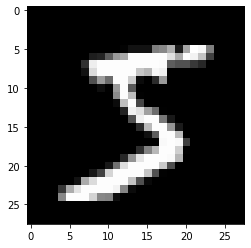

In [3]:
plt.imshow(x_train[0], cmap='gray')

In [4]:
plt.show()

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),
metrics=['accuracy'])

In [11]:
batch_size = 128
epoch = 20
history = model.fit(x_train, y_train, batch_size=batch_size,epochs=epoch)

Epoch 1/20
469/469 [==============================] - 21s 36ms/step - loss: 4.0224 - accuracy: 0.8595
Epoch 2/20
469/469 [==============================] - 16s 33ms/step - loss: 0.5505 - accuracy: 0.9013
Epoch 3/20
469/469 [==============================] - 13s 27ms/step - loss: 0.4125 - accuracy: 0.9238
Epoch 4/20
469/469 [==============================] - 13s 27ms/step - loss: 0.3626 - accuracy: 0.9310
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 0.3216 - accuracy: 0.9384
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 0.3025 - accuracy: 0.9414
Epoch 7/20
469/469 [==============================] - 11s 24ms/step - loss: 0.2699 - accuracy: 0.9481
Epoch 8/20
469/469 [==============================] - 13s 27ms/step - loss: 0.2697 - accuracy: 0.9492
Epoch 9/20
469/469 [==============================] - 12s 25ms/step - loss: 0.2634 - accuracy: 0.9505
Epoch 10/20
469/469 [==============================] - 11s 23ms/step - loss: 0.255

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3397146165370941
Test accuracy: 0.9656999707221985
